In [1]:
# import pandas_datareader as pdr

In [2]:
# key='0d96e0d715738cdf202e541c9b9fc18355450df2'

In [3]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
# df.to_csv('/content/drive/MyDrive/AI/DL/Stock_Price_Prediction/AAPL.csv')

In [5]:
import pandas as pd


In [6]:
df = pd.read_csv('/content/drive/MyDrive/AI/DL/Stock_Price_Prediction/AAPL.csv')

In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-04-26 00:00:00+00:00,134.72,135.06,133.560,134.83,66905069,134.72,135.06,133.560,134.83,66905069,0.0,1.0
1255,AAPL,2021-04-27 00:00:00+00:00,134.39,135.41,134.110,135.01,66015804,134.39,135.41,134.110,135.01,66015804,0.0,1.0
1256,AAPL,2021-04-28 00:00:00+00:00,133.58,135.02,133.080,134.31,107760097,133.58,135.02,133.080,134.31,107760097,0.0,1.0
1257,AAPL,2021-04-29 00:00:00+00:00,133.48,137.07,132.450,136.47,151100953,133.48,137.07,132.450,136.47,151100953,0.0,1.0
1258,AAPL,2021-04-30 00:00:00+00:00,131.46,133.56,131.065,131.78,109839466,131.46,133.56,131.065,131.78,109839466,0.0,1.0


In [8]:
df1 = df.reset_index()['close']

In [9]:
df1.shape

(1259,)

In [10]:
import matplotlib.pyplot as plt


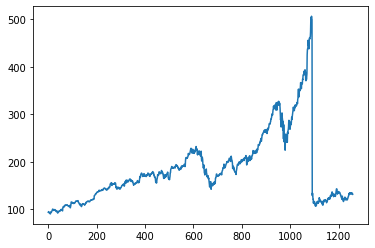

In [11]:
plt.plot(df1)

In [12]:
import numpy as np


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[0.00793746],
       [0.01164161],
       [0.00926037],
       ...,
       [0.10400481],
       [0.10376428],
       [0.09890559]])

In [17]:
train_size = int(len(df1)*0.65)
train_size

818

In [18]:
test_size = len(df1) - train_size
test_size

441

In [19]:
train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1),:1]

In [20]:
test_data

array([[0.28404089],
       [0.27343355],
       [0.24774504],
       [0.25654841],
       [0.2614552 ],
       [0.27201443],
       [0.26614552],
       [0.26491882],
       [0.28533975],
       [0.27037883],
       [0.26794949],
       [0.27939868],
       [0.28865905],
       [0.2886831 ],
       [0.29416717],
       [0.29373422],
       [0.27011425],
       [0.27937462],
       [0.27377029],
       [0.27706554],
       [0.28543596],
       [0.28478653],
       [0.27747444],
       [0.28586891],
       [0.29570655],
       [0.29565845],
       [0.29784726],
       [0.30393265],
       [0.32050511],
       [0.31930247],
       [0.3088635 ],
       [0.31162959],
       [0.31355382],
       [0.31853277],
       [0.31417919],
       [0.3064101 ],
       [0.30879134],
       [0.30628984],
       [0.31434756],
       [0.31160553],
       [0.30903187],
       [0.32141912],
       [0.3229104 ],
       [0.30936861],
       [0.31384245],
       [0.32873121],
       [0.32885147],
       [0.322

In [21]:
train_data

array([[0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.02422129],
       [0.02407697],
       [0.02289838],
       [0.01953097],
       [0.01775105],
       [0.01823211],
       [0.01993987],
       [0.02090198],
       [0.02068551],
       [0.02239327],
       [0.02042093],
       [0.01683704],
       [0.01712568],
       [0.01635598],
       [0.01734215],
       [0.01200241],
       [0.01144919],
       [0.01339747],
       [0.01253157],
       [0.01385448],
       [0.00736019],
       [0.004089  ],
       [0.0078172 ],
       [0.00976548],
       [0.01265183],
       [0.01334937],
       [0.01118461],
       [0.01248346],
       [0.01346963],
       [0.015

In [22]:
def create_dataset(dataset,time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [23]:
time_step=100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((717, 100), (717,), (340, 100), (340,))

In [25]:
X_train

array([[0.00793746, 0.01164161, 0.00926037, ..., 0.05589898, 0.05587492,
        0.05582682],
       [0.01164161, 0.00926037, 0.00697535, ..., 0.05587492, 0.05582682,
        0.05840048],
       [0.00926037, 0.00697535, 0.00572459, ..., 0.05582682, 0.05840048,
        0.05380637],
       ...,
       [0.20490679, 0.20247745, 0.19761876, ..., 0.28502706, 0.28461816,
        0.28064943],
       [0.20247745, 0.19761876, 0.19860493, ..., 0.28461816, 0.28064943,
        0.28238124],
       [0.19761876, 0.19860493, 0.21301263, ..., 0.28064943, 0.28238124,
        0.2870475 ]])

In [26]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [27]:
X_train.shape

(717, 100, 1)

In [28]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_test.shape

(340, 100, 1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [30]:
model = Sequential()

In [31]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))

In [32]:
model.add(LSTM(50,return_sequences=True))

In [33]:
model.add(LSTM(50))

In [34]:
model.add(Dense(1))

In [35]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100, batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 36s 126ms/step - loss: 0.0195 - val_loss: 0.0461
Epoch 2/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0029 - val_loss: 0.0252
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0015 - val_loss: 0.0250
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 7.4928e-04 - val_loss: 0.0214
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 5.1933e-04 - val_loss: 0.0217
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 4.4995e-04 - val_loss: 0.0209
Epoch 7/100
12/12 [==============================] - 0s 17ms/step - loss: 4.4367e-04 - val_loss: 0.0200
Epoch 8/100
12/12 [==============================] - 0s 17ms/step - loss: 3.8822e-04 - val_loss: 0.0196
Epoch 9/100
12/12 [==============================] - 0s 18ms/step - loss: 4.1731e-04 - val_loss: 0.0192
Epoch 10/100
12/12 [==============================] - 0s 17ms/step - loss:

In [38]:
train_predict = model.predict(X_train)

In [39]:
test_predict = model.predict(X_test)

In [40]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [41]:
import math

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
math.sqrt(mean_squared_error(y_train,train_predict))

171.7062184645349

In [44]:
math.sqrt(mean_squared_error(y_test,test_predict))

263.30541498867524

In [45]:
look_back=100

In [46]:
train_predict_plot = np.empty_like(df1)

In [47]:
train_predict_plot[:,:] = np.nan
train_predict_plot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [48]:
train_predict_plot[look_back:look_back+len(train_predict),:] = train_predict

In [49]:
train_predict_plot[101]

array([113.849617])

In [50]:
test_predict_plot = np.empty_like(df1)

In [51]:
test_predict_plot[:,:] = np.nan

In [52]:
test_predict_plot[look_back+len(train_predict)+look_back+1:len(df1)-1,:] = test_predict

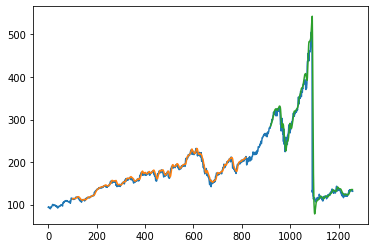

In [53]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [54]:
X_input = test_data[341:].reshape(1,-1)
X_input

array([[0.08036079, 0.08187613, 0.07562237, 0.0791341 , 0.0771377 ,
        0.07562237, 0.09029465, 0.09012628, 0.09226699, 0.08734817,
        0.0911365 , 0.09991581, 0.09770295, 0.10013229, 0.11148527,
        0.10710764, 0.10434155, 0.1018641 , 0.09397474, 0.09782321,
        0.08721587, 0.09760673, 0.10032471, 0.09294047, 0.09250752,
        0.09753458, 0.0927721 , 0.08851473, 0.09017438, 0.10027661,
        0.11191822, 0.11720986, 0.12647023, 0.1270475 , 0.12440168,
        0.11244738, 0.10010824, 0.10535177, 0.10739627, 0.10487072,
        0.11316897, 0.11165364, 0.11201443, 0.10984967, 0.10835839,
        0.10773301, 0.10831028, 0.10306675, 0.09741431, 0.09469633,
        0.09508118, 0.0857727 , 0.08543596, 0.08420926, 0.07372219,
        0.07437162, 0.09007817, 0.08365604, 0.07629585, 0.07165364,
        0.07475646, 0.06258569, 0.07395069, 0.07129284, 0.07605532,
        0.0738184 , 0.08093806, 0.08473842, 0.08279014, 0.07261575,
        0.0713169 , 0.07949489, 0.07745039, 0.07

In [55]:
X_input.shape

(1, 100)

In [56]:
temp_input = list(X_input)

In [57]:
temp_input = temp_input[0].tolist()

In [58]:
temp_input

[0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418523,
 0.11720986169573056,
 0.12647023451593503,
 0.1270475045099218,
 0.12440168370414911,
 0.11244738424533973,
 0.10010823812387254,
 0.10535177390258565,
 0.10739627179795552,
 0.10487071557426336,
 0.11316897173782314,
 0.11165363800360789,
 0.11201443174984965,
 0.10984966927239925,
 0.10835838845460005,
 0.10773301262778

In [59]:
n_steps = 100

In [60]:
i=0
lst_output = []
while (i<30):
  if (len(temp_input)>100):
    X_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,X_input))
    X_input = X_input.reshape(1,-1)
    X_input = X_input.reshape((1,n_steps,1))
    y_hat = model.predict(X_input,verbose=0)
    print("{} day output {}".format(i,y_hat))
    temp_input.extend(y_hat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(y_hat.tolist())
    i=i+1
  else:
    X_input = X_input.reshape((1,n_steps,1))
    y_hat = model.predict(X_input,verbose=0)
    print(y_hat[0])
    temp_input.extend(y_hat[0].tolist())
    print(len(temp_input))
    lst_output.extend(y_hat.tolist())
    i=i+1
lst_output


[0.10815876]
101
1 day input [0.08187613 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465
 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295
 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474
 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752
 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822
 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824
 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443
 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431
 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219
 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646
 0.06258569 0.07395069 0.07129284 0.07605532 0.0738184  0.08093806
 0.08473842 0.08279014 0.07261575 0.0713169  0.07949489 0.07745039
 0.07155743 0.07276007 0.07425135 0.07468431 0.07110042 0.07651233
 0.07855683 0.08553217 0.08627781 0.09034275 0.09625977 0.10259771
 0.09837643 0.10604931 0.10027661

[[0.10815875977277756],
 [0.10810263454914093],
 [0.10840969532728195],
 [0.10904764384031296],
 [0.10992556810379028],
 [0.11095281690359116],
 [0.1120610386133194],
 [0.11320646107196808],
 [0.11436455696821213],
 [0.11552345752716064],
 [0.11667840927839279],
 [0.11782827973365784],
 [0.11897338926792145],
 [0.12011480331420898],
 [0.12125372141599655],
 [0.12239152193069458],
 [0.12352968007326126],
 [0.12466972321271896],
 [0.12581324577331543],
 [0.126961812376976],
 [0.1281169056892395],
 [0.12927991151809692],
 [0.13045205175876617],
 [0.13163435459136963],
 [0.13282769918441772],
 [0.134032741189003],
 [0.135250061750412],
 [0.13647998869419098],
 [0.13772282004356384],
 [0.1389787346124649]]

In [61]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [62]:
df3 = df1.tolist()

In [63]:
df3.extend(lst_output)

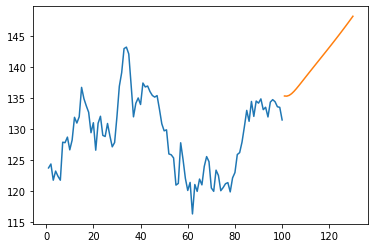

In [65]:
plt.plot(day_new,scaler.inverse_transform(df1[(len(df1)-100):]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

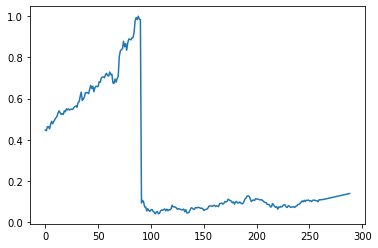

In [66]:
plt.plot(df3[1000:])
plt.show()